In [5]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt


# Load dataset
df = pd.read_csv('../data/household_power_consumption.txt', sep=';', 
                 parse_dates=[[0, 1]], infer_datetime_format=True,
                 na_values='?', low_memory=False)

df.head()


C:\Users\abhir\AppData\Local\Temp\ipykernel_12552\2346397728.py:7: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv('../data/household_power_consumption.txt', sep=';',
C:\Users\abhir\AppData\Local\Temp\ipykernel_12552\2346397728.py:7: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('../data/household_power_consumption.txt', sep=';',
C:\Users\abhir\AppData\Local\Temp\ipykernel_12552\2346397728.py:7: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('../data/household_power_consumption.txt

,Date_Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
1,2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2,2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
3,2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
4,2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [7]:
# 1️⃣ Rename columns for simplicity
df.columns = ['datetime', 'Global_active_power', 'Global_reactive_power',
              'Voltage', 'Global_intensity', 'Sub_metering_1',
              'Sub_metering_2', 'Sub_metering_3']

# 2️⃣ Drop rows with missing values (if any)
df.dropna(inplace=True)

# 3️⃣ Convert numeric columns to float (if needed)
df[df.columns[1:]] = df[df.columns[1:]].astype(float)

# 4️⃣ Set datetime column as the index
df.set_index('datetime', inplace=True)

# ✅ Preview cleaned data
df.head()


ValueError: Length mismatch: Expected axis has 7 elements, new values have 8 elements

In [8]:
# Resample the Global Active Power to daily usage (sum of each day)
daily_usage = df['Global_active_power'].resample('D').sum()

# Preview the daily usage data
daily_usage.head()


datetime
2006-12-16    1209.176
2006-12-17    3390.460
2006-12-18    2203.826
2006-12-19    1666.194
2006-12-20    2225.748
Freq: D, Name: Global_active_power, dtype: float64

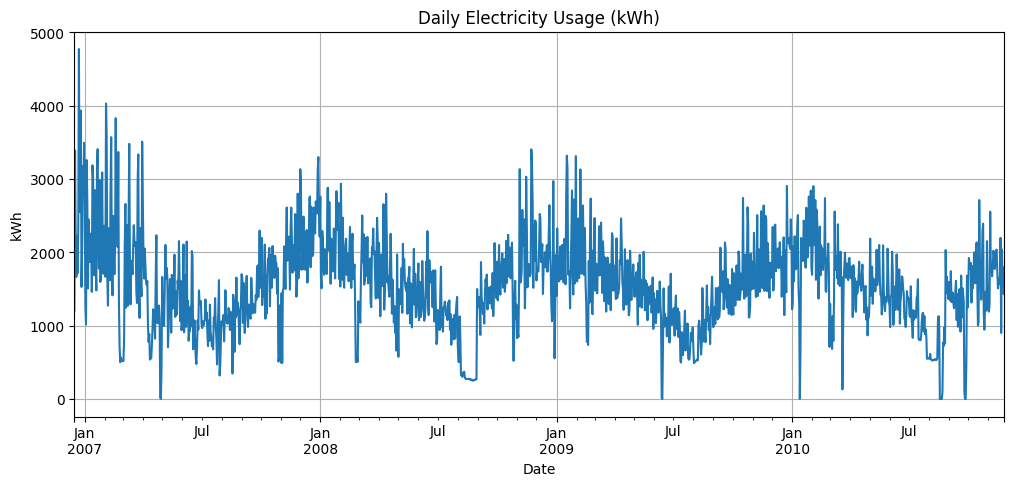

In [9]:
# Plot daily electricity usage
plt.figure(figsize=(12, 5))
daily_usage.plot()
plt.title("Daily Electricity Usage (kWh)")
plt.xlabel("Date")
plt.ylabel("kWh")
plt.grid(True)
plt.show()


In [10]:
!pip install prophet


   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
   --- ------------------------------------ 1.3/13.3 MB 8.4 MB/s eta 0:00:02
   ------- -------------------------------- 2.6/13.3 MB 7.2 MB/s eta 0:00:02
   ----------- ---------------------------- 3.9/13.3 MB 6.5 MB/s eta 0:00:02
   -------------- ------------------------- 4.7/13.3 MB 6.2 MB/s eta 0:00:02
   ----------------- ---------------------- 5.8/13.3 MB 5.8 MB/s eta 0:00:02
   -------------------- ------------------- 6.8/13.3 MB 5.4 MB/s eta 0:00:02
   ---------------------- ----------------- 7.3/13.3 MB 5.3 MB/s eta 0:00:02
   ------------------------ --------------- 8.1/13.3 MB 5.0 MB/s eta 0:00:02
   -------------------------- ------------- 8.9/13.3 MB 4.9 MB/s eta 0:00:01
   ----------------------------- ---------- 9.7/13.3 MB 4.6 MB/s eta 0:00:01
   ------------------------------ --------- 10.2/13.3 MB 4.5 MB/s eta 0:00:01
   -------------------------------- ------- 10.7/13.3 MB 4.3 MB/s eta 0:00:01
   -


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
from prophet import Prophet

# Step 1: Convert daily usage to DataFrame with 'ds' and 'y' columns
df_prophet = daily_usage.reset_index()
df_prophet.columns = ['ds', 'y']  # Prophet needs these exact names

# Step 2: Create and train the Prophet model
model = Prophet()
model.fit(df_prophet)


c:\Users\abhir\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.
11:38:23 - cmdstanpy - INFO - Chain [1] start processing
11:38:24 - cmdstanpy - INFO - Chain [1] done processing


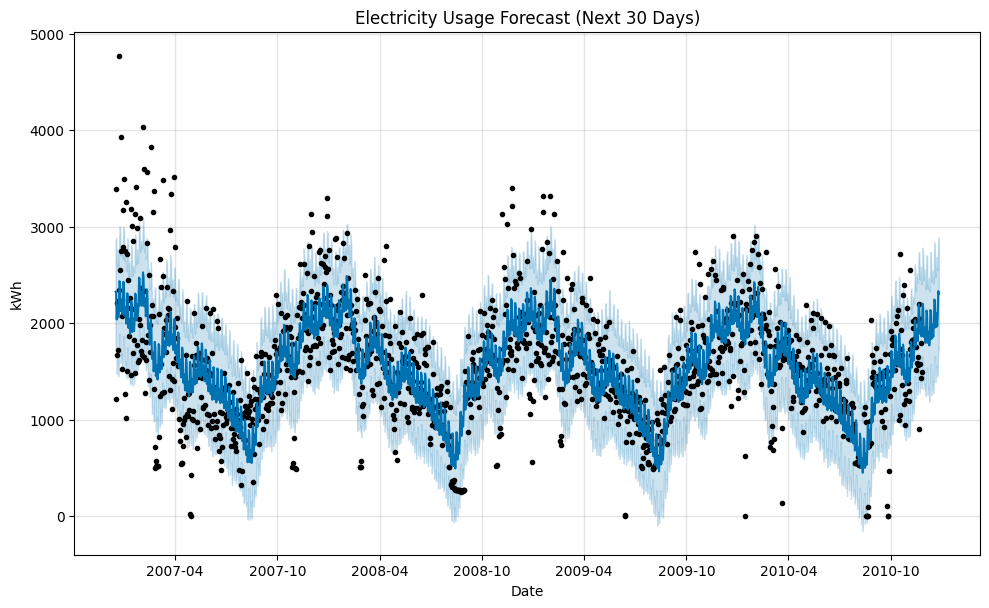

In [12]:
# Step 3: Create a DataFrame for future dates (30 days ahead)
future = model.make_future_dataframe(periods=30)

# Step 4: Predict future values
forecast = model.predict(future)

# Step 5: Plot forecast
model.plot(forecast)
plt.title("Electricity Usage Forecast (Next 30 Days)")
plt.xlabel("Date")
plt.ylabel("kWh")
plt.show()


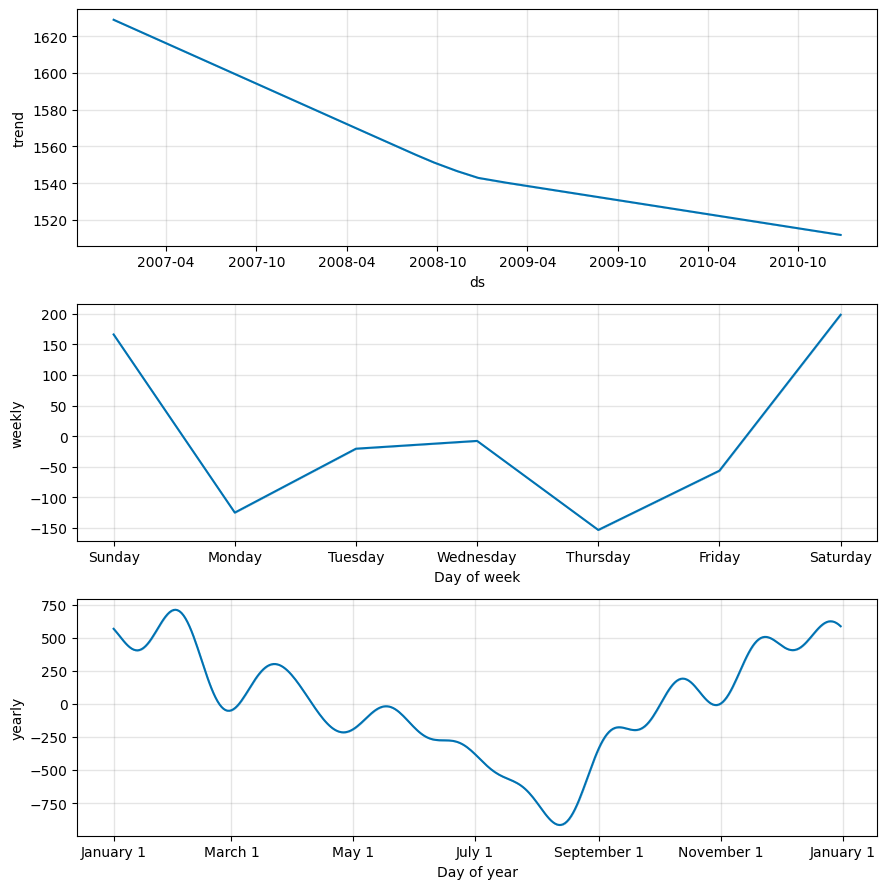

In [13]:
model.plot_components(forecast)
plt.show()


In [1]:
# If starting standalone Day 3
import pandas as pd
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import joblib

# Load and clean again (optional)
df = pd.read_csv('../data/household_power_consumption.txt', sep=';', 
                 parse_dates=[[0, 1]], infer_datetime_format=True,
                 na_values='?', low_memory=False)

df.columns = ['datetime', 'Global_active_power', 'Global_reactive_power',
              'Voltage', 'Global_intensity', 'Sub_metering_1',
              'Sub_metering_2', 'Sub_metering_3']

df.dropna(inplace=True)
df[df.columns[1:]] = df[df.columns[1:]].astype(float)
df.set_index('datetime', inplace=True)

# Daily energy usage in kWh (convert minutes → hours)
daily_usage = df['Global_active_power'].resample('D').sum() / 60
daily_usage = daily_usage.reset_index()
daily_usage.columns = ['date', 'energy_usage']


C:\Users\abhir\AppData\Local\Temp\ipykernel_14292\3235098832.py:8: FutureWarning: Support for nested sequences for 'parse_dates' in pd.read_csv is deprecated. Combine the desired columns with pd.to_datetime after parsing instead.
  df = pd.read_csv('../data/household_power_consumption.txt', sep=';',
C:\Users\abhir\AppData\Local\Temp\ipykernel_14292\3235098832.py:8: FutureWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df = pd.read_csv('../data/household_power_consumption.txt', sep=';',
C:\Users\abhir\AppData\Local\Temp\ipykernel_14292\3235098832.py:8: UserWarning: Parsing dates in %d/%m/%Y %H:%M:%S format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df = pd.read_csv('../data/household_power_consumption.txt

In [2]:
# Train model
model = IsolationForest(n_estimators=100, contamination=0.01, random_state=42)
model.fit(daily_usage[['energy_usage']])

# Predict anomalies
daily_usage['anomaly'] = model.predict(daily_usage[['energy_usage']])
daily_usage['anomaly'] = daily_usage['anomaly'].map({1: 0, -1: 1})  # 1 = anomaly
daily_usage['score'] = model.decision_function(daily_usage[['energy_usage']])


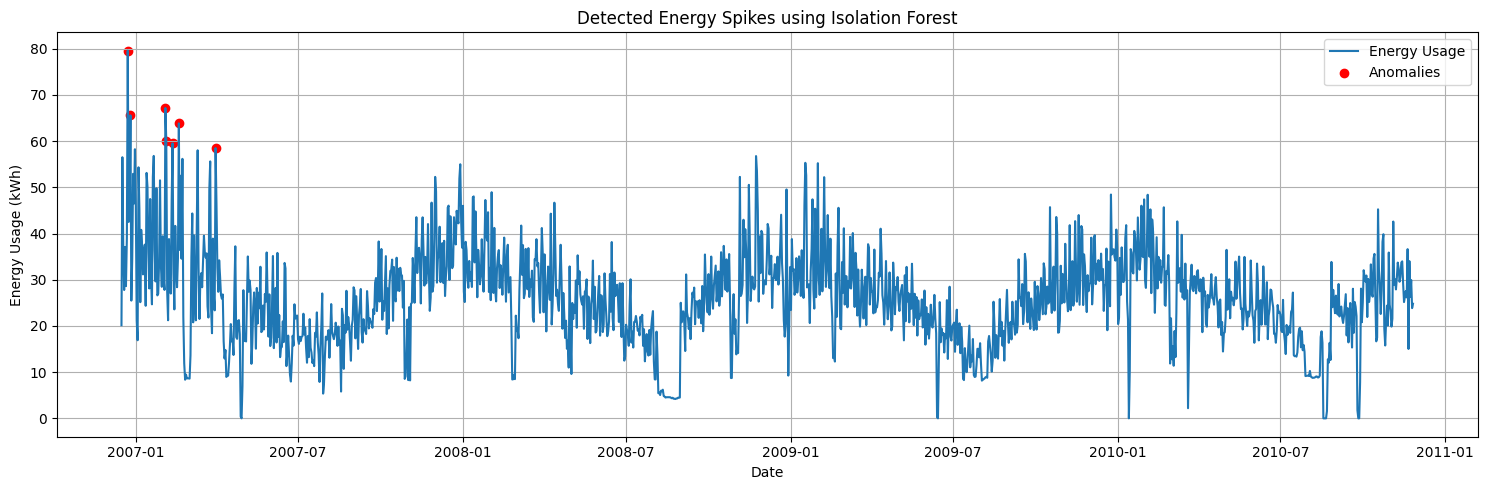

In [3]:
plt.figure(figsize=(15, 5))
plt.plot(daily_usage['date'], daily_usage['energy_usage'], label='Energy Usage')
plt.scatter(daily_usage[daily_usage['anomaly'] == 1]['date'], 
            daily_usage[daily_usage['anomaly'] == 1]['energy_usage'], 
            color='red', label='Anomalies')
plt.title("Detected Energy Spikes using Isolation Forest")
plt.xlabel("Date")
plt.ylabel("Energy Usage (kWh)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
